### Лабораторная №5

Выполнила Карасева Екатерина M33351

# Разделимость данных

In [218]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%pylab inline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import math

Populating the interactive namespace from numpy and matplotlib


Примените алгоритмы уменьшения размерности к данным из предыдущей лабораторной, объясните полученные результаты

In [219]:
# данные из предыдущей лабораторной
df = pd.read_csv('lab4_user_data.csv')
df.head()

,completed,dropped,mean_score,gender
2,887,60,7.36,Male
5,594,12,5.42,Male
6,433,0,5.36,Female
7,227,9,7.96,Female
8,430,11,7.68,Non-Binary


1. С помощью любого из рассмотренных на лекциях алгоритмов снижения размерности спроецируйте тренировочные данные в 2d пространство. Визуализируйте результаты снижения размерности. Цветом обозначьте категорию объекта

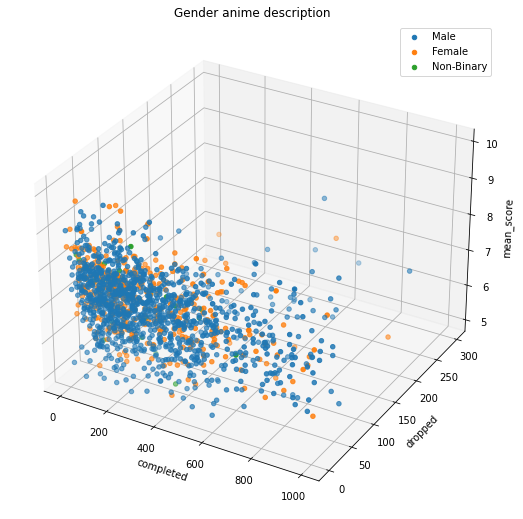

In [220]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(projection='3d')
ax.scatter(df[df['gender'] == 'Male']['completed'], df[df['gender'] == 'Male']['dropped'], df[df['gender'] == 'Male']['mean_score'], label = 'Male')
ax.scatter(df[df['gender'] == 'Female']['completed'], df[df['gender'] == 'Female']['dropped'], df[df['gender'] == 'Female']['mean_score'], label = 'Female')
ax.scatter(df[df['gender'] == 'Non-Binary']['completed'], df[df['gender'] == 'Non-Binary']['dropped'], df[df['gender'] == 'Non-Binary']['mean_score'], label = 'Non-Binary')
ax.set_xlabel("completed")
ax.set_ylabel("dropped")
ax.set_zlabel("mean_score")
ax.set_title("Gender anime description")
ax.legend()
plt.show()

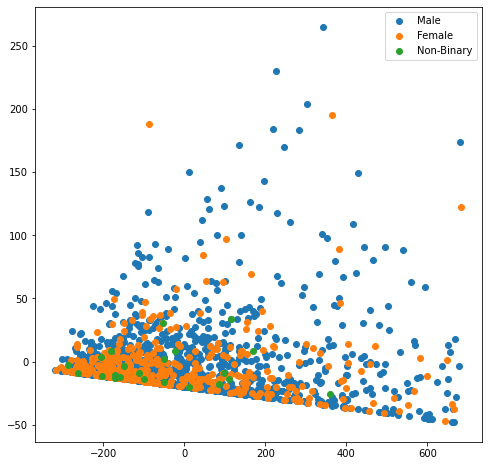

In [221]:
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(df.drop(['gender'], axis=1))
new_df = pd.DataFrame(x_reduced, df['gender'])
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
ax.scatter(new_df.loc['Male'][0], new_df.loc['Male'][1], label = 'Male')
ax.scatter(new_df.loc['Female'][0], new_df.loc['Female'][1], label = 'Female')
ax.scatter(new_df.loc['Non-Binary'][0], new_df.loc['Non-Binary'][1], label = 'Non-Binary')
ax.legend()
plt.show()


2. Примените алгоритм кластеризации к спроецированным данным.

In [222]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(x_reduced)
clastered_df = pd.DataFrame(x_reduced, kmeans.labels_)

In [223]:
# попытка провести внешнюю оценку
print('Male:')
print(len(set(zip(new_df.loc['Male'][0], new_df.loc['Male'][1])).intersection(set(zip(clastered_df.loc[0][0], clastered_df.loc[0][1])))))
print(len(set(zip(new_df.loc['Male'][0], new_df.loc['Male'][1])).intersection(set(zip(clastered_df.loc[1][0], clastered_df.loc[1][1])))))
print(len(set(zip(new_df.loc['Male'][0], new_df.loc['Male'][1])).intersection(set(zip(clastered_df.loc[2][0], clastered_df.loc[2][1])))))
print('Female:')
print(len(set(zip(new_df.loc['Female'][0], new_df.loc['Female'][1])).intersection(set(zip(clastered_df.loc[0][0], clastered_df.loc[0][1])))))
print(len(set(zip(new_df.loc['Female'][0], new_df.loc['Female'][1])).intersection(set(zip(clastered_df.loc[1][0], clastered_df.loc[1][1])))))
print(len(set(zip(new_df.loc['Female'][0], new_df.loc['Female'][1])).intersection(set(zip(clastered_df.loc[2][0], clastered_df.loc[2][1])))))
print('Non-Binary:')
print(len(set(zip(new_df.loc['Non-Binary'][0], new_df.loc['Non-Binary'][1])).intersection(set(zip(clastered_df.loc[0][0], clastered_df.loc[0][1])))))
print(len(set(zip(new_df.loc['Non-Binary'][0], new_df.loc['Non-Binary'][1])).intersection(set(zip(clastered_df.loc[1][0], clastered_df.loc[1][1])))))
print(len(set(zip(new_df.loc['Non-Binary'][0], new_df.loc['Non-Binary'][1])).intersection(set(zip(clastered_df.loc[2][0], clastered_df.loc[2][1])))))

Male:
597
150
357
Female:
238
45
110
Non-Binary:
14
1
7


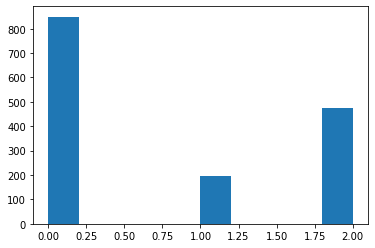

In [224]:
# более удачная внешняя оценка
plt.hist(kmeans.labels_)
plt.show()

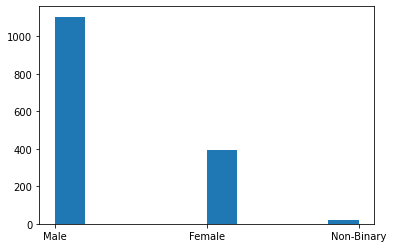

In [225]:
plt.hist(df['gender'])
plt.show()

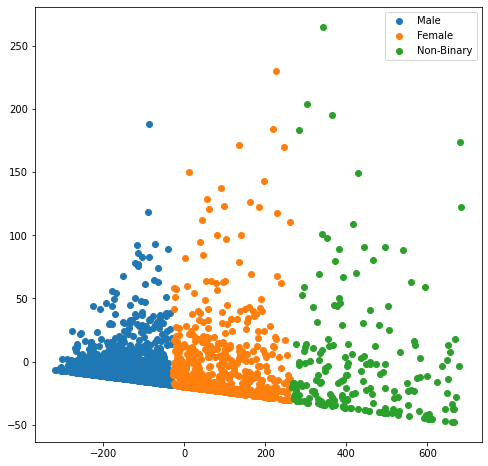

In [226]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
ax.scatter(clastered_df.loc[0][0], clastered_df.loc[0][1], label = 'Male')
ax.scatter(clastered_df.loc[2][0], clastered_df.loc[2][1], label = 'Female')
ax.scatter(clastered_df.loc[1][0], clastered_df.loc[1][1], label = 'Non-Binary')
ax.legend()
plt.show()

Рассчитайте средние внутрикластерное и межкласторное расстояния получившейся проекции

In [257]:
# внутренняя оценка
def intracluster_dist(i) :
    sum = 0
    censer = kmeans.cluster_centers_[i]
    for (f, s) in zip(clastered_df.loc[i][0], clastered_df.loc[i][1]) :
        sum += math.hypot(f - censer[0], s - censer[1])
    return sum
print('внутрикластерное расстояние:')
sum = 0
for i in range(3) :
    sum += intracluster_dist(i)/len(clastered_df.loc[i])
    print('claster ' + str(i))
    print(intracluster_dist(i)/len(clastered_df.loc[i]))
print('sum = ' + str(sum))

внутрикластерное расстояние:
claster 0
62.363614340290454
claster 1
111.66177655759121
claster 2
77.14159778553169
sum = 251.16698868341336


In [263]:
def intercluster_dist() :
    sum = 0
    for i in range(3) :
        censer = kmeans.cluster_centers_[i]
        for (f, s) in zip(clastered_df[0], clastered_df[1]) :
            sum += math.hypot(f - censer[0], s - censer[1])
    return sum
print('межкласторное расстояние: ' + str(intercluster_dist()/clastered_df.size))

межкласторное расстояние: 423.90951777187104


3. Опишите результаты

In [266]:
sum/(intercluster_dist()/clastered_df.size)

0.5925014139894356